### **Import Libraries**

In [8]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### **Read Dataset**

In [51]:
df=pd.read_csv("train.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Dataset Description</title>
    <style>
        body {
            margin: 0;
            padding: 0;
            background-color: #7cfc00; /* Yeşil arka plan */
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            font-family: Arial, sans-serif;
        }
        .table-container {
            background-color: rgb(123, 199, 161); /* Beyaz tablo arka planı */
            padding: 20px;
            border-radius: 10px;
            box-shadow: 0 4px 8px 
            (0, 0, 0, 0.2);
            width: 80%;
            max-width: 800px;
        }
        h3 {
            text-align: left;
            margin-bottom: 20px;
            color: #333;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            text-align: left;
            padding: 10px;
            border-bottom: 2px solid #ddd;
        }
        th {
            border-bottom: 2px solid #7cfc00; /* Başlık kenar çizgisi */
        }
        td {
            vertical-align: top;
        }
        code {
            color: #d63384;
            background-color: #f8f9fa;
            padding: 2px 4px;
            border-radius: 3px;
        }
    </style>
</head>
<body>
    <div class="table-container">
        <h3>Dataset Description:</h3>
        <table>
            <tr>
                >Variable Name</th>
                <th>Description</th>
            </tr>
            <tr>
                <td><span class="variable">ID</span></td>
                <td>Unikal identifikator.</td>
            </tr>
            <tr>
                <td><span class="variable">Customer_ID</span></td>
                <td>Müştəri identifikatoru.</td>
            </tr>
            <tr>
                <td><span class="variable">Month</span></td>
                <td>Müştəri məlumatının aid olduğu ay.</td>
            </tr>
            <tr>
                <td><span class="variable">Name</span></td>
                <td>Müştərinin adı.</td>
            </tr>
            <tr>
                <td><span class="variable">Age</span></td>
                <td>Müştərinin yaşı.</td>
            </tr>
            <tr>
                <td><span class="variable">SSN</span></td>
                <td>Sosial təminat nömrəsi (tam məxfi formada).</td>
            </tr>
            <tr>
                <td><span class="variable">Occupation</span></td>
                <td>Müştərinin işi (məsələn, Scientist, Teacher və s.).</td>
            </tr>
            <tr>
                <td><span class="variable">Annual_Income</span></td>
                <td>İllik qazanc.</td>
            </tr>
            <tr>
                <td><span class="variable">Monthly_Inhand_Salary</span></td>
                <td>Aylıq əlində qalan vəsait.</td>
            </tr>
            <tr>
                <td><span class="variable">Num_Bank_Accounts</span></td>
                <td>Bank hesablarının sayı.</td>
            </tr>
            <tr>
                <td><span class="variable">Num_Credit_Card</span></td>
                <td>Kredit kartlarının sayı.</td>
            </tr>
            <tr>
                <td><span class="variable">Interest_Rate</span></td>
                <td>Faiz dərəcəsi (orta faiz).</td>
            </tr>
            <tr>
                <td><span class="variable">Num_of_Loan</span></td>
                <td>Götürülmüş kredit sayı.</td>
            </tr>
            <tr>
                <td><span class="variable">Type_of_Loan</span></td>
                <td>Kredit növü (mətn formatında).</td>
            </tr>
            <tr>
                <td><span class="variable">Delay_from_due_date</span></td>
                <td>Kredit kartı ödənişində orta gecikmə (gün).</td>
            </tr>
            <tr>
                <td><span class="variable">Num_of_Delayed_Payment</span></td>
                <td>Ümumilikdə neçə dəfə gecikmiş ödəniş.</td>
            </tr>
            <tr>
                <td><span class="variable">Changed_Credit_Limit</span></td>
                <td>Kredit limitindəki dəyişiklik.</td>
            </tr>
            <tr>
                <td><span class="variable">Num_Credit_Inquiries</span></td>
                <td>Kredit sorğuları sayı.</td>
            </tr>
            <tr>
                <td><span class="variable">Credit_Mix</span></td>
                <td>Kredit tipi (Bad, Standard, Good).</td>
            </tr>
            <tr>
                <td><span class="variable">Outstanding_Debt</span></td>
                <td>Qalan borc.</td>
            </tr>
            <tr>
                <td><span class="variable">Credit_Utilization_Ratio</span></td>
                <td>Kredit istifadəsinin faizi.</td>
            </tr>
            <tr>
                <td><span class="variable">Credit_History_Age</span></td>
                <td>Kredit tarixçəsinin yaşı.</td>
            </tr>
            <tr>
                <td><span class="variable">Payment_of_Min_Amount</span></td>
                <td>Min. ödənişi vaxtında ödəyir, ya yox (Yes/No).</td>
            </tr>
            <tr>
                <td><span class="variable">Total_EMI_per_month</span></td>
                <td>Aylıq ödənilən kredit EMI (Əsas + faiz) cəmi.</td>
            </tr>
            <tr>
                <td><span class="variable">Amount_invested_monthly</span></td>
                <td>Aylıq qoyulan vəsait.</td>
            </tr>
            <tr>
                <td><span class="variable">Payment_Behaviour</span></td>
                <td>Ödəniş davranışı (mətn formatında).</td>
            </tr>
            <tr>
                <td><span class="variable">Monthly_Balance</span></td>
                <td>Aylıq balans.</td>
            </tr>
            <tr>
                <td><span class="variable">Credit_Score</span></td>
                <td>Hədəf sütunu (Poor, Standard, Good).</td>
            </tr>
        </table>
    </div>
</body>
</html>


### **Dataset Overview**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [11]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [12]:
df.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000,100000
unique,10128,15,6261,3,3,6,3
top,Stevex,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,7096,11408,45848,52326,28616,53174


In [13]:
df.isnull().sum().sum()

np.int64(0)

### **Exploratory Data Analysis (EDA)**

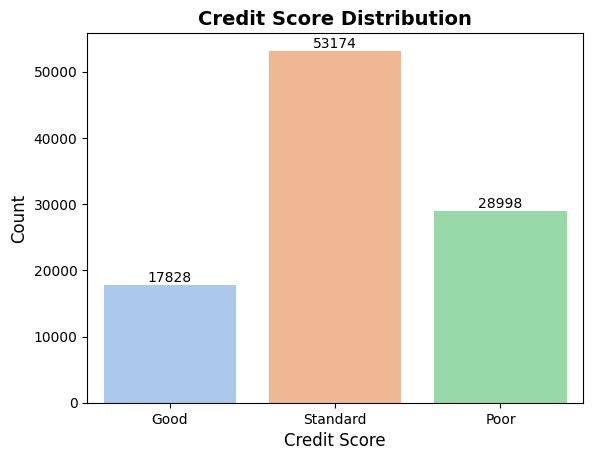

In [75]:
ax= sns.countplot(data=df, x='Credit_Score', palette='pastel')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.title('Credit Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Credit Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

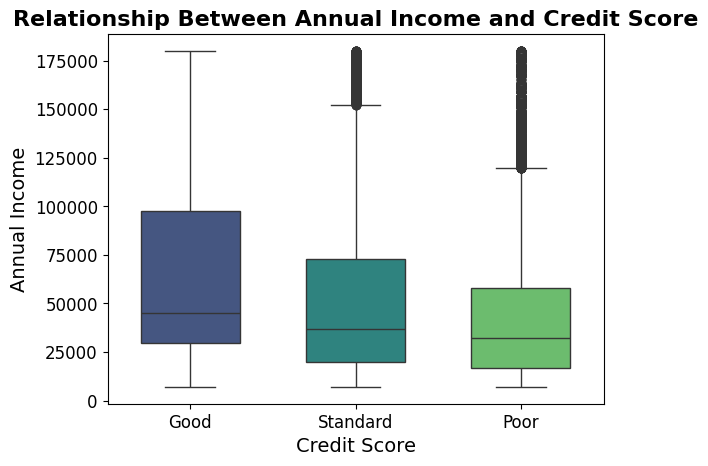

In [74]:
sns.boxplot(data=df, x='Credit_Score', y='Annual_Income', palette='viridis', width=0.6)

plt.title("Relationship Between Annual Income and Credit Score", fontsize=16, fontweight='bold')
plt.xlabel("Credit Score", fontsize=14)
plt.ylabel("Annual Income", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

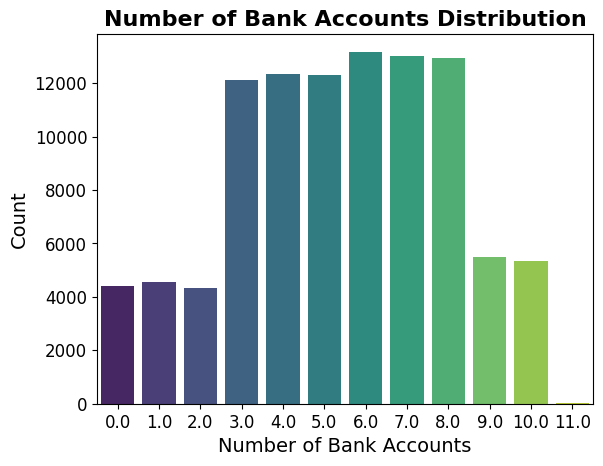

In [76]:
sns.countplot(data=df, x='Num_Bank_Accounts', palette='viridis')

plt.title('Number of Bank Accounts Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bank Accounts', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

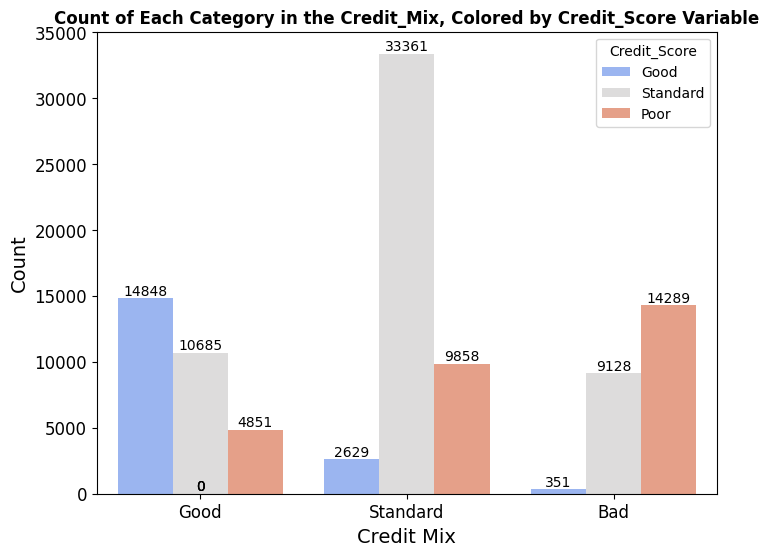

In [73]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df, palette='coolwarm')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Count of Each Category in the Credit_Mix, Colored by Credit_Score Variable', fontweight='bold')
plt.xlabel('Credit Mix', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

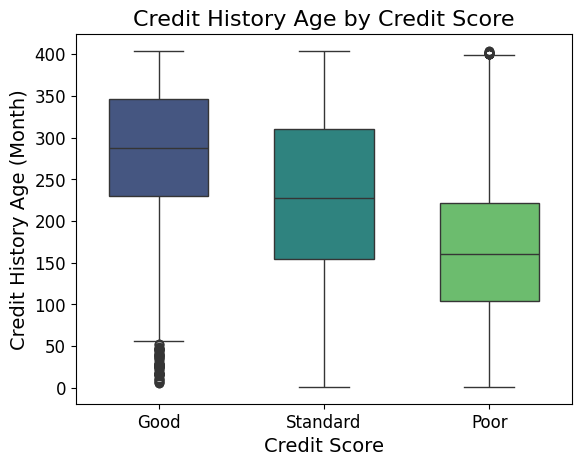

In [61]:
sns.boxplot(data=df, x='Credit_Score', y='Credit_History_Age', palette='viridis', width=0.6)

plt.title('Credit History Age by Credit Score', fontsize=16)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Credit History Age (Month)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### **Data Transformation**

In [19]:
df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'], inplace=True)

In [20]:
for i in df['Type_of_Loan'].value_counts().head(10).index[2:] : 
    df[i] = df['Type_of_Loan'].str.contains(i).astype(int)

del df['Type_of_Loan']

In [21]:
label=OrdinalEncoder()
encoder=['Occupation','Payment_of_Min_Amount','Credit_Mix','Payment_Behaviour','Credit_Score']
df[encoder]=label.fit_transform(df[encoder])

### **Separating Features (X) and Target Variable (y)**

In [22]:
X=df.drop('Credit_Score', axis=1)
y=df['Credit_Score']

In [23]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Hyperparameter Tuning Using Grid Search and Stratified K-Fold**

In [24]:
def tune_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1_macro', n_splits=4, n_iter=10, n_jobs = 4):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    randomized_search = RandomizedSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_iter=n_iter, n_jobs=n_jobs)
    randomized_search.fit(X_train, y_train)
    
    return randomized_search.best_estimator_, randomized_search.best_params_

### **Random Forest Hyperparameter Tuning**

In [25]:
rf_base = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [200, 300, 400],
    'criterion': ['gini'],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [10, 20, 30], 
    'min_samples_leaf': [5, 10, 15],
}

# Tune hyperparameterss
best_rf, best_rf_hyperparams = tune_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

# Print optimal hyperparametersS
print("\n=== Random Forest Optimal Hyperparameters ===")
for param, value in best_rf_hyperparams.items():
    print(f"{param}: {value}")

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, best_rf.predict(X_train)))

print("\n\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, best_rf.predict(X_test)))


=== Random Forest Optimal Hyperparameters ===
n_estimators: 300
min_samples_split: 10
min_samples_leaf: 5
max_depth: 20
criterion: gini

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84     14301
         1.0       0.86      0.87      0.87     23124
         2.0       0.89      0.88      0.89     42575

    accuracy                           0.87     80000
   macro avg       0.86      0.87      0.87     80000
weighted avg       0.87      0.87      0.87     80000



=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75      3527
         1.0       0.79      0.80      0.79      5874
         2.0       0.83      0.81      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.78      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000

